Load Data into a Pandas DataFrame

Here’s the Python code to load this data into a pandas DataFrame:

In [9]:
import pandas as pd

# Load data into a pandas dataframe
data = {
    'User': ['Miguel', 'Miguel', 'Miguel', 'Rossel', 'Rossel', 'Rossel', 'Charlie', 'Charlie'],
    'Movie': ['Inception', 'The Matrix', 'Interstellar', 'Inception', 'The Matrix', 'The Dark Knight', 'Inception', 'Interstellar'],
    'Rating': [4, 5, 3, 3, 4, 5, 2, 4]
}

df = pd.DataFrame(data)

# Print the dataframe
print(df)

# Save the dataframe to a CSV file
df.to_csv('movie_ratings.csv', index=False)

print("CSV file created successfully.")

      User            Movie  Rating
0    Alice        Inception       4
1    Alice       The Matrix       5
2    Alice     Interstellar       3
3      Bob        Inception       3
4      Bob       The Matrix       4
5      Bob  The Dark Knight       5
6  Charlie        Inception       2
7  Charlie     Interstellar       4
CSV file created successfully.


Calculate Average Ratings

To show the average ratings for each user and each movie:

In [10]:
# Average ratings for each user
user_avg = df.groupby('User')['Rating'].mean().reset_index(name='Average Rating')
print(user_avg)

# Average ratings for each movie
movie_avg = df.groupby('Movie')['Rating'].mean().reset_index(name='Average Rating')
print(movie_avg)

      User  Average Rating
0    Alice             4.0
1      Bob             4.0
2  Charlie             3.0
             Movie  Average Rating
0        Inception             3.0
1     Interstellar             3.5
2  The Dark Knight             5.0
3       The Matrix             4.5


Normalize Ratings

Normalize the ratings by subtracting the mean and dividing by the standard deviation:

In [11]:
# Normalize ratings for each user
df['Normalized Rating'] = df.groupby('User')['Rating'].transform(lambda x: (x - x.mean()) / x.std())
print(df)

# New dataframe with normalized ratings
normalized_df = df[['User', 'Movie', 'Normalized Rating']]

# Average normalized ratings
user_norm_avg = normalized_df.groupby('User')['Normalized Rating'].mean().reset_index(name='Average Normalized Rating')
print(user_norm_avg)

movie_norm_avg = normalized_df.groupby('Movie')['Normalized Rating'].mean().reset_index(name='Average Normalized Rating')
print(movie_norm_avg)

      User            Movie  Rating  Normalized Rating
0    Alice        Inception       4           0.000000
1    Alice       The Matrix       5           1.000000
2    Alice     Interstellar       3          -1.000000
3      Bob        Inception       3          -1.000000
4      Bob       The Matrix       4           0.000000
5      Bob  The Dark Knight       5           1.000000
6  Charlie        Inception       2          -0.707107
7  Charlie     Interstellar       4           0.707107
      User  Average Normalized Rating
0    Alice                        0.0
1      Bob                        0.0
2  Charlie                        0.0
             Movie  Average Normalized Rating
0        Inception                  -0.569036
1     Interstellar                  -0.146447
2  The Dark Knight                   1.000000
3       The Matrix                   0.500000


Text-Based Conclusion

Advantages of Normalized Ratings:

Reduces bias from users who rate consistently high or low.

Provides a more standardized comparison between ratings.

Disadvantages of Normalized Ratings:

Can obscure absolute preferences (e.g., a normalized 0 doesn’t indicate like/dislike).

May become less intuitive for users to understand.

Step 6: Standardized Ratings (Extra Credit)

Standardize the ratings:

In [12]:
# Standardize ratings for each user (z-score normalization)
df['Standardized Rating'] = df.groupby('User')['Rating'].transform(lambda x: (x - x.mean()) / x.std())
print(df)

# New dataframe with standardized ratings
standardized_df = df[['User', 'Movie', 'Standardized Rating']]

# Average standardized ratings
user_std_avg = standardized_df.groupby('User')['Standardized Rating'].mean().reset_index(name='Average Standardized Rating')
print(user_std_avg)

movie_std_avg = standardized_df.groupby('Movie')['Standardized Rating'].mean().reset_index(name='Average Standardized Rating')
print(movie_std_avg)

      User            Movie  Rating  Normalized Rating  Standardized Rating
0    Alice        Inception       4           0.000000             0.000000
1    Alice       The Matrix       5           1.000000             1.000000
2    Alice     Interstellar       3          -1.000000            -1.000000
3      Bob        Inception       3          -1.000000            -1.000000
4      Bob       The Matrix       4           0.000000             0.000000
5      Bob  The Dark Knight       5           1.000000             1.000000
6  Charlie        Inception       2          -0.707107            -0.707107
7  Charlie     Interstellar       4           0.707107             0.707107
      User  Average Standardized Rating
0    Alice                          0.0
1      Bob                          0.0
2  Charlie                          0.0
             Movie  Average Standardized Rating
0        Inception                    -0.569036
1     Interstellar                    -0.146447
2  The Dark 

DataFrame Loaded:
      User            Movie  Rating
0    Alice        Inception       4
1    Alice       The Matrix       5
2    Alice     Interstellar       3
3      Bob        Inception       3
4      Bob       The Matrix       4
5      Bob  The Dark Knight       5
6  Charlie        Inception       2
7  Charlie     Interstellar       4
Average Ratings by User:
      User  Average Rating
0    Alice             4.0
1      Bob             4.0
2  Charlie             3.0
Average Ratings by Movie:
             Movie  Average Rating
0        Inception             3.0
1     Interstellar             3.5
2  The Dark Knight             5.0
3       The Matrix             4.5


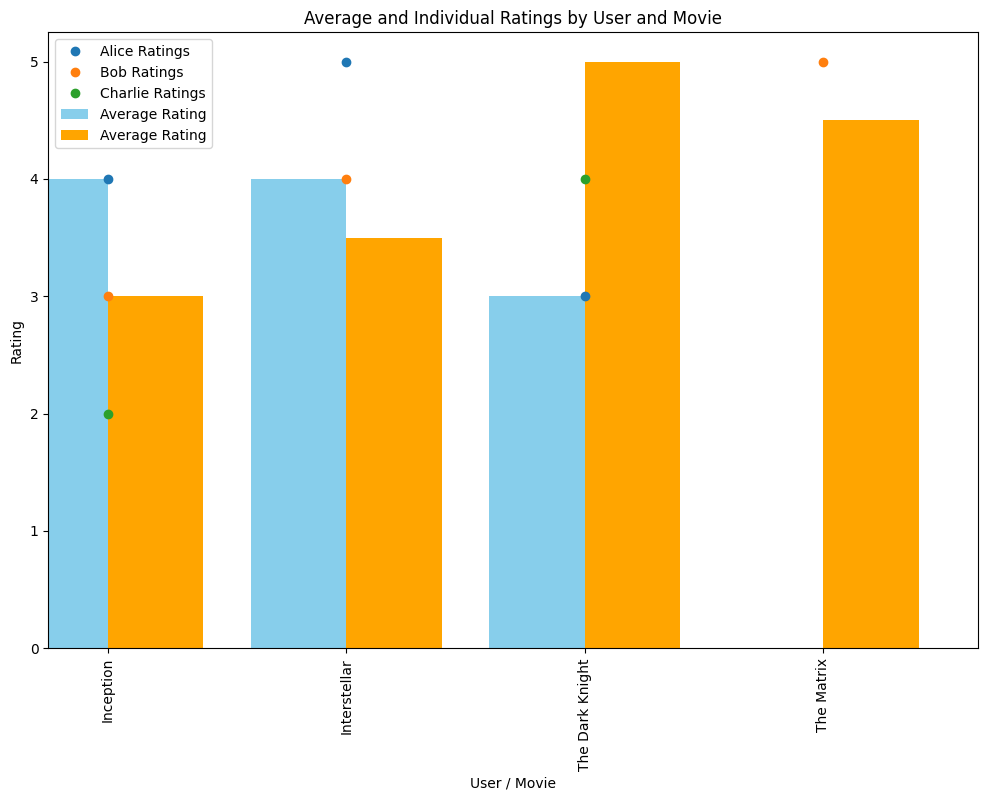

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
df = pd.read_csv('movie_ratings.csv')
print("DataFrame Loaded:")
print(df)

# Calculate average ratings for each user
user_avg = df.groupby('User')['Rating'].mean().reset_index(name='Average Rating')
print("Average Ratings by User:")
print(user_avg)

# Calculate average ratings for each movie
movie_avg = df.groupby('Movie')['Rating'].mean().reset_index(name='Average Rating')
print("Average Ratings by Movie:")
print(movie_avg)

# Create the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Plot individual user ratings
for user in df['User'].unique():
    user_data = df[df['User'] == user]
    ax.plot(user_data['Movie'], user_data['Rating'], marker='o', linestyle='', label=f'{user} Ratings')

# Plot average ratings by user
user_avg.plot(kind='bar', x='User', y='Average Rating', ax=ax, color='skyblue', position=1, width=0.4, legend=True)

# Plot average ratings by movie
movie_avg.plot(kind='bar', x='Movie', y='Average Rating', ax=ax, color='orange', position=0, width=0.4, legend=True)

# Customize chart
ax.set_title('Average and Individual Ratings by User and Movie')
ax.set_xlabel('User / Movie')
ax.set_ylabel('Rating')
ax.legend()

# Show the plot
plt.show()